# Decision Tree Worksheet

In [ ]:
!pip install graphviz

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(url,names=names)
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)
data.head()


X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=10, min_samples_leaf=1)  
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

Print accuracy of training and validation data.

In [ ]:
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is 98.4
Validation Accuracy is 82.53968253968253


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
decision_tree2 = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=4, min_samples_leaf=20)  
decision_tree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=20)

Print accuracy of training and validation data.

In [ ]:
y_train_pred=decision_tree2.predict(X_train)
print("Training Accuracy is", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree2.predict(X_val)
print("Validation Accuracy is", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is 80.4
Validation Accuracy is 74.60317460317461


Explain the accuracy results below. 

A high max-depth and lower min. sample leafs warranted a larger margin between the training accuracy and the validation accuracy, whereas a lower max-depth and higher min. sample leafs (2nd model) warranted a smaller margin between the two. Low max-depth and high min. sample leafs help prevent overfitting to the training data, which explains the decreased training accuracy and increased validation accuracy in model 2 compared to model 1. 

## Metrics

Plot the ROC curve and print the AUC of the second model.

AUC: 0.8331521739130435


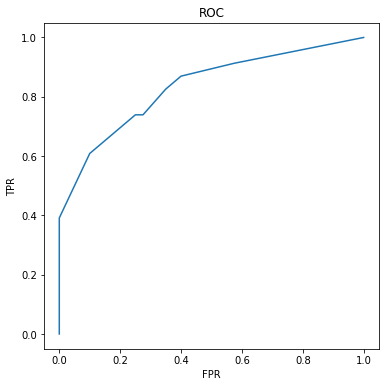

In [ ]:
y_val_prob = decision_tree2.predict_proba(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

print('AUC:', roc_auc)

Use graphviz to visualize your 2nd tree.

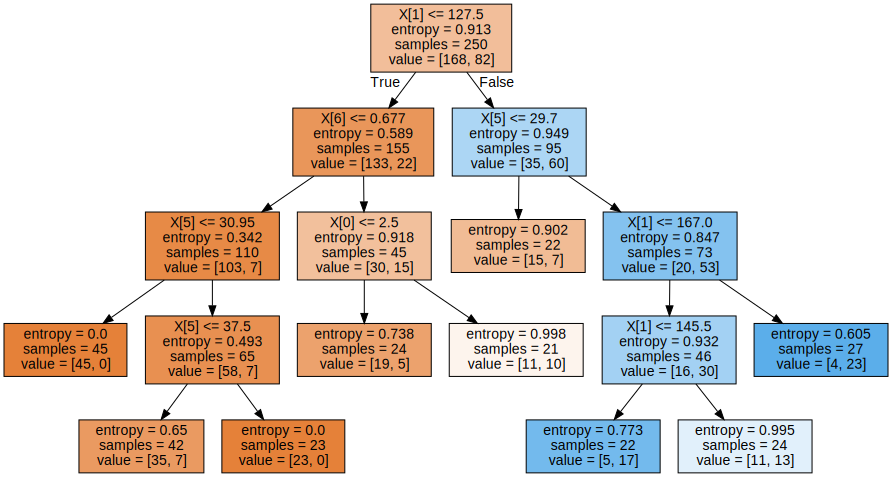

In [ ]:
dot_data = tree.export_graphviz(decision_tree2, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

Different features

Question 2: What is the root feature? Does it make sense as the root feature?

'plas' is the root feature. It makes sense because class correlates the most strongly with plas, so plas is the most determinative of class, and higher nodes should be able to split the data more effectively.

In [ ]:
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
plas,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
pres,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
skin,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
test,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
mass,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
pedi,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
class,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

Training accuracy would increase and the test accuracy would decrease. 

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
decision_tree2 = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=500, min_samples_leaf=1)  
decision_tree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=500)

In [ ]:
y_train_pred=decision_tree2.predict(X_train)
print("Training Accuracy is", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree2.predict(X_val)
print("Validation Accuracy is", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is 100.0
Validation Accuracy is 79.36507936507937


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [ ]:
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  82.53968253968253


How did the accuracy compare to the decision tree's accuracy?

The training accuracy for the Random Forest Classifier (100%) was overall higher than the training accuracy for the decision tree (94%).

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
X_3_best = SelectKBest(chi2,k=3).fit(X_train,y_train)
mask = X_3_best.get_support()
new_feat = []
for bool,feature in zip(mask,X_train.columns):
    if bool:
        new_feat.append(feature)

print(new_feat)

['plas', 'test', 'age']


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

Training Accuracy is  86.8
Validation Accuracy is  58.730158730158735
Training Accuracy is  98.0
Validation Accuracy is  77.77777777777779
Training Accuracy is  98.8
Validation Accuracy is  79.36507936507937
Training Accuracy is  99.2
Validation Accuracy is  71.42857142857143
Training Accuracy is  100.0
Validation Accuracy is  76.19047619047619
Training Accuracy is  99.6
Validation Accuracy is  80.95238095238095
Training Accuracy is  99.6
Validation Accuracy is  76.19047619047619
Training Accuracy is  99.6
Validation Accuracy is  79.36507936507937
Training Accuracy is  100.0
Validation Accuracy is  74.60317460317461
Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937
Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095
Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095
Training Accuracy is  100.0
Validation Accuracy is  84.12698412698413
Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937
Training Accuracy is  100.

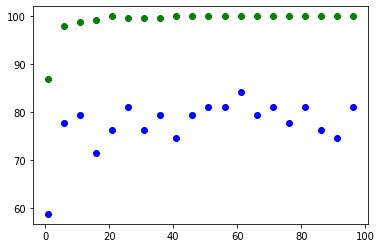

In [ ]:
for num_trees in range(1,100,5):
    random_forest = RandomForestClassifier(n_estimators = num_trees)
    random_forest.fit(X_train,y_train)

    y_train_pred=random_forest.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)*100
    print("Training Accuracy is ", train_acc)
    plt.plot(num_trees,train_acc,color='green', linestyle='solid', linewidth = 3, 
         marker='o')

    y_val_pred=random_forest.predict(X_val)
    val_acc = accuracy_score(y_val,y_val_pred)*100
    print("Validation Accuracy is ",val_acc )
    plt.plot(num_trees,val_acc,color='blue', linestyle='solid', linewidth = 3, 
         marker='o')

plt.show()


In [ ]:
X_val.shape

(63, 8)

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


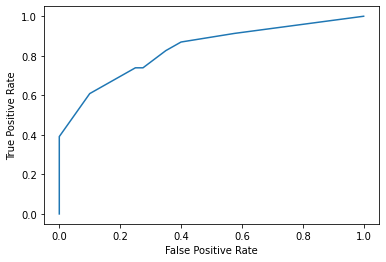

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url)

X = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y = 'class'

log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)


predict_proba = log_regression.predict_proba(X_test)[::,1]
#fpr = metrics.roc_curve(y_test, predict_proba)
#tpr = metrics.roc_curve(y_test, predict_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e65ab1c-218c-4689-b130-b98413f4efb9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>